In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IoTpond1.csv")
data.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data.shape

(83126, 11)

 __We have 83126 rows and 11 columns in dataset.__

In [ ]:
#ratio of null values
data.isnull().sum()/data.shape[0] *100

created_at                0.000000
entry_id                  0.000000
Temperature (C)           0.000000
Turbidity(NTU)            0.000000
Dissolved Oxygen(g/ml)    0.000000
PH                        0.000000
Ammonia(g/ml)             0.062556
Nitrate(g/ml)             0.000000
Population                0.000000
Fish_Length(cm)           0.002406
Fish_Weight(g)            0.002406
dtype: float64

__We have 0.063%, 0.0024% and 0.0024% of missing values missing values in Ammonia(g/ml), Fish_Length(cm) and Fish_Weight(g) columns respectively.__


In [ ]:
#Check for number of missing values
data.isnull().sum()

created_at                 0
entry_id                   0
Temperature (C)            0
Turbidity(NTU)             0
Dissolved Oxygen(g/ml)     0
PH                         0
Ammonia(g/ml)             52
Nitrate(g/ml)              0
Population                 0
Fish_Length(cm)            2
Fish_Weight(g)             2
dtype: int64

In [ ]:
#fill missing values with mean
data['Ammonia(g/ml)']= data['Ammonia(g/ml)'].fillna(data['Ammonia(g/ml)'].mean())
data['Fish_Length(cm)']= data['Fish_Length(cm)'].fillna(data['Fish_Length(cm)'].mean())
data['Fish_Weight(g)']= data['Fish_Weight(g)'].fillna(data['Fish_Weight(g)'].mean())


In [ ]:
#Check for number of missing values
data.isnull().sum()

created_at                0
entry_id                  0
Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Population                0
Fish_Length(cm)           0
Fish_Weight(g)            0
dtype: int64

In [ ]:
# drop created_at and entry_id columns
data = data.drop(['created_at','entry_id'], axis= 1)
data.head()

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


``

 Understanding the correlation between various features in the dataset

In [ ]:
correlation = data.corr()

<Axes: >

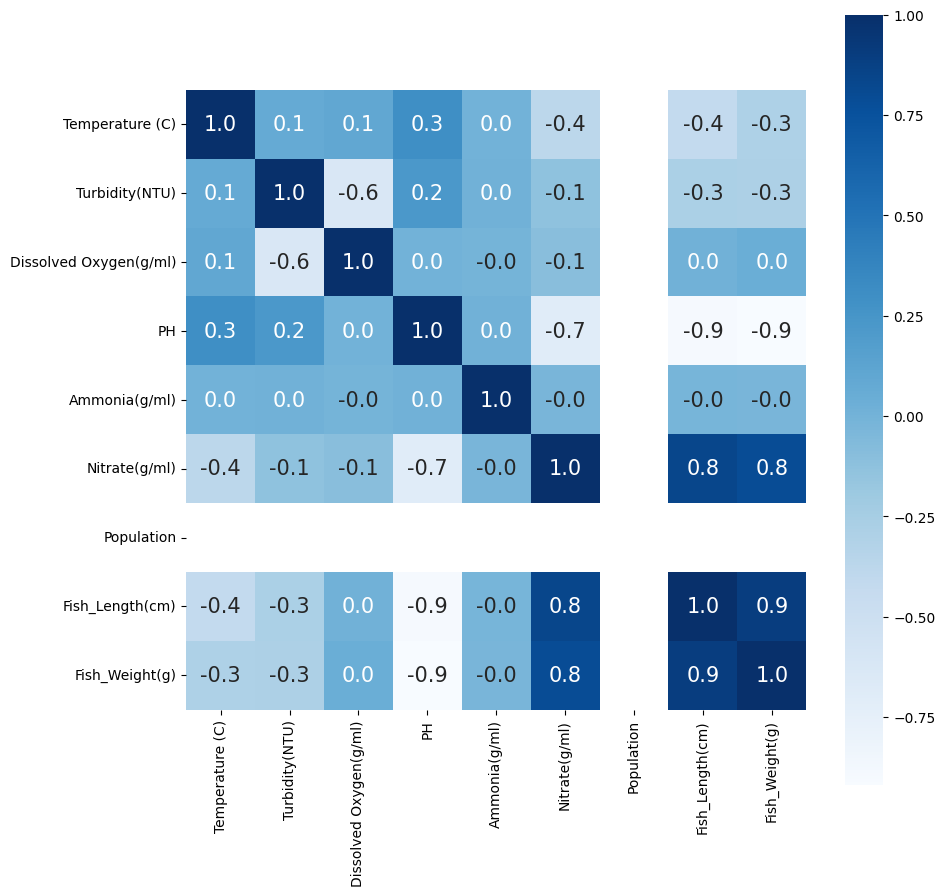

In [ ]:
# Contructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Blues')

In [ ]:
# drop Population column
data = data.drop(['Population'], axis= 1)
data.head()

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_Length(cm),Fish_Weight(g)
0,24.8750,100,4.505,8.43365,0.45842,193,7.11,2.91
1,24.9375,100,6.601,8.43818,0.45842,194,7.11,2.91
2,24.8750,100,15.797,8.42457,0.45842,192,7.11,2.91
3,24.9375,100,5.046,8.43365,0.45842,193,7.11,2.91
4,24.9375,100,38.407,8.40641,0.45842,192,7.11,2.91


In [ ]:
correlation = data.corr()

<Axes: >

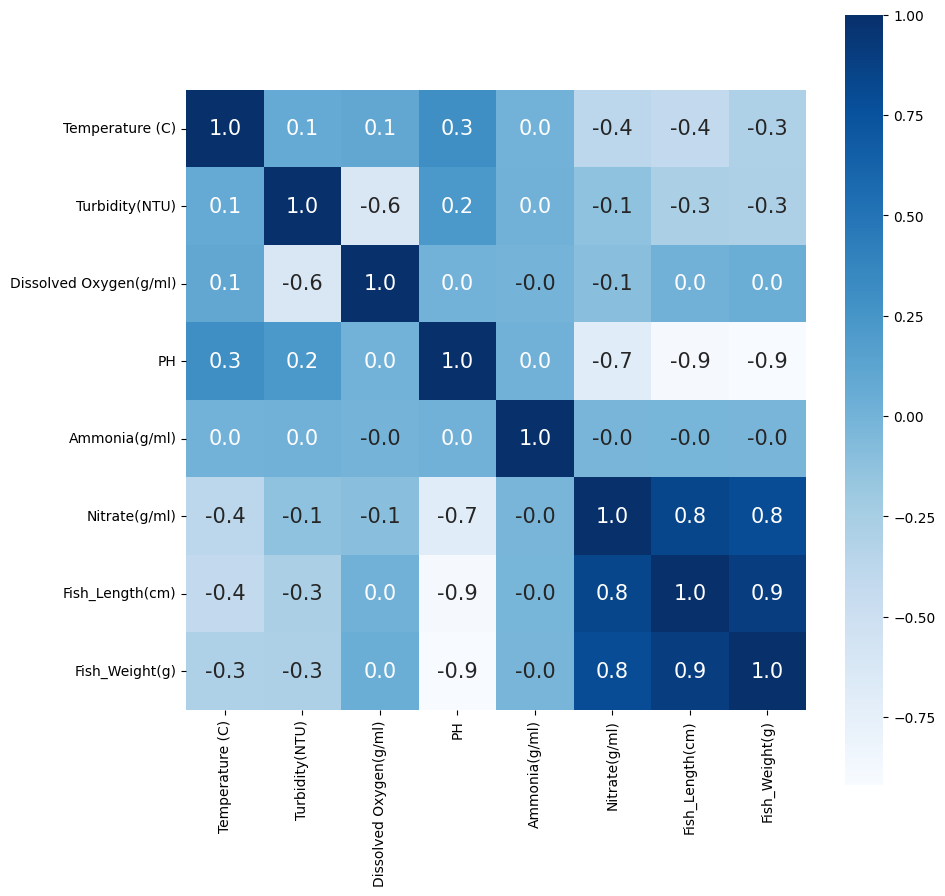

In [ ]:
# Contructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Blues')

In [ ]:
# Check for infinite values
print(np.isinf(data).sum())


Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Fish_Length(cm)           0
Fish_Weight(g)            0
dtype: int64


In [ ]:
data.head()

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_Length(cm),Fish_Weight(g)
0,24.8750,100,4.505,8.43365,0.45842,193,7.11,2.91
1,24.9375,100,6.601,8.43818,0.45842,194,7.11,2.91
2,24.8750,100,15.797,8.42457,0.45842,192,7.11,2.91
3,24.9375,100,5.046,8.43365,0.45842,193,7.11,2.91
4,24.9375,100,38.407,8.40641,0.45842,192,7.11,2.91


In [ ]:
data.describe()

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_Length(cm),Fish_Weight(g)
count,83126.000000,83126.000000,83126.000000,83126.000000,8.312600e+04,83126.000000,83126.000000,83126.000000
mean,24.573376,87.490160,12.390251,7.518329,2.030817e+08,458.294408,16.414686,44.568470
std,0.861532,25.859375,12.518253,0.534787,7.863770e+09,338.313206,5.272180,33.215091
min,-127.000000,1.000000,0.007000,-0.586270,6.770000e-03,45.000000,7.110000,2.910000
25%,24.125000,91.000000,3.440000,7.153520,4.584200e-01,146.000000,11.790000,14.190000
50%,24.562500,100.000000,7.133000,7.357790,6.139700e-01,347.000000,18.080000,54.700000
75%,24.937500,100.000000,15.819000,7.838980,1.565161e+01,823.000000,21.000000,67.520000
max,27.750000,100.000000,41.046000,8.551670,4.270000e+11,1936.000000,33.450000,318.640000


Splitting the data and target

In [ ]:
# Drop the target variables from the input features dataframe
X = data.drop(['Fish_Length(cm)', 'Fish_Weight(g)'], axis=1)

# Extract the target variables
Y = data['Fish_Length(cm)']
Z = data['Fish_Weight(g)']


Splitting data into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 2)

In [ ]:
X_train, X_test, Z_train, Z_test = train_test_split(X,Z, test_size= 0.2, random_state= 2)

## Model training


Decision Tree Regressor for fish lenght


In [ ]:
# define the model
model = DecisionTreeRegressor()

# define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# define the evaluation metric to use for scoring
scoring = 'neg_root_mean_squared_error'

# define the grid search object with cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv)

# fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# print the best hyperparameters and RMSE score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best RMSE score: {abs(grid_search.best_score_)}")


Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best RMSE score: 0.49835623033849996


In [ ]:
# train the model with the best hyperparameters
model = DecisionTreeRegressor(**grid_search.best_params_)


model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2)



Prediction on Test data

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Evaluate the model on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
msle = mean_squared_log_error(Y_test, y_pred)

print(f"Test MSE score: {mse}")
print(f"Test RMSE score: {rmse}")
print(f"Test MAE score: {mae}")
print(f"Test R-squared score: {r2}")
print(f"Test MSLE score: {msle}")


Test MSE score: 0.23550103882290224
Test RMSE score: 0.48528449266682966
Test MAE score: 0.1957626433642104
Test R-squared score: 0.9914878703667341
Test MSLE score: 0.0006355236024362151


In [ ]:
# get the feature importances and sort them by value
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()

importances

Turbidity(NTU)            0.000819
Dissolved Oxygen(g/ml)    0.001211
Ammonia(g/ml)             0.001686
Nitrate(g/ml)             0.001701
Temperature (C)           0.002956
PH                        0.991627
dtype: float64

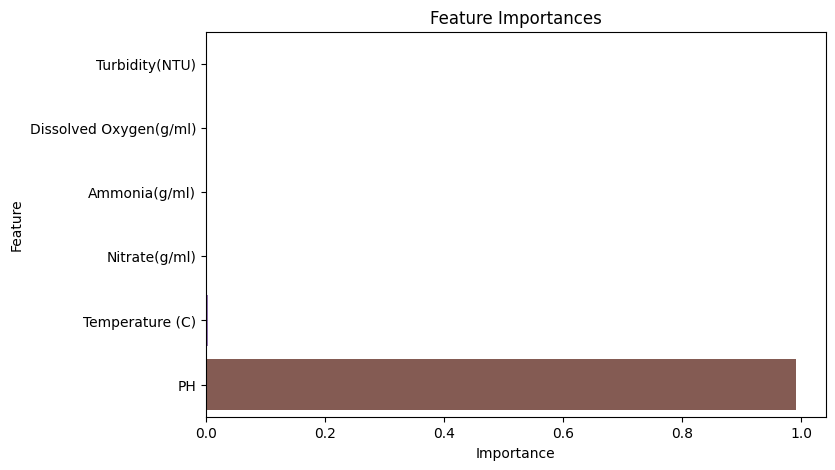

In [ ]:
# plot the feature importances
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


* __PH,Temperature (C), Nitrate(g/ml), Ammonia(g/ml) are the most important attributes to determine the Fish Length(cm).__

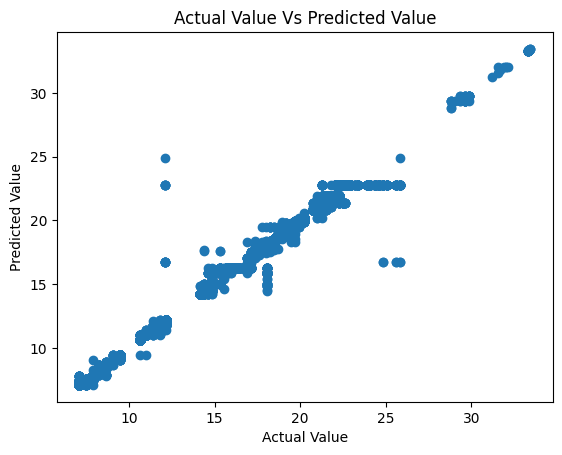

In [ ]:
# create a scatter plot of the actual vs predicted values on the test set
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.show()


XGBoost *Regressor* for fish weight

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# define the model
xgb_model = XGBRegressor()

# define the grid of hyperparameters to search
param_distributions = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 200, 500],
    'gamma': [0, 0.1, 0.5, 1],
    'min_child_weight': [1, 5, 10]
}

# define the evaluation metric to use for scoring
scoring = 'neg_root_mean_squared_error'

# define the randomized search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, scoring=scoring, cv=5)

# fit the randomized search object to the data
random_search.fit(X_train, Z_train)

# print the best hyperparameters and RMSE score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best RMSE score: {abs(random_search.best_score_)}")

Best hyperparameters: {'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1}
Best RMSE score: 0.6355722659396872


In [ ]:
# train the model with the best hyperparameters
xgb_model = XGBRegressor(**random_search.best_params_)
xgb_model.fit(X_train, Z_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

*Prediction* on Test data

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Evaluate the model on the test set
z_pred = xgb_model.predict(X_test)

mse = mean_squared_error(Z_test, z_pred)
rmse = mean_squared_error(Z_test, z_pred, squared=False)
mae = mean_absolute_error(Z_test, z_pred)
r2 = r2_score(Z_test, z_pred)
msle = mean_squared_log_error(Z_test, z_pred)

print(f"Test MSE score: {mse}")
print(f"Test RMSE score: {rmse}")
print(f"Test MAE score: {mae}")
print(f"Test R-squared score: {r2}")
print(f"Test MSLE score: {msle}")


Test MSE score: 0.39620883829530473
Test RMSE score: 0.6294512199490162
Test MAE score: 0.25707687943618146
Test R-squared score: 0.9996397479713501
Test MSLE score: 0.0003924828217858932


In [ ]:
# get the feature importances and sort them by value
importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values()

importances

Ammonia(g/ml)             0.000490
Dissolved Oxygen(g/ml)    0.000550
Turbidity(NTU)            0.004784
Temperature (C)           0.013277
Nitrate(g/ml)             0.089028
PH                        0.891871
dtype: float32

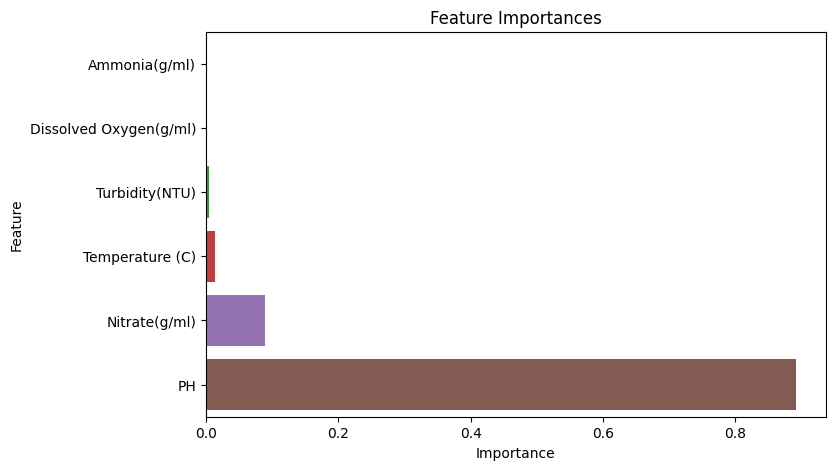

In [ ]:
# plot the feature importances
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

* __PH, Nitrate(g/ml), Ammonia(g/ml), Temperature (C), Turbidity(NTU) are the most important attributes to determine the Fish Weight(g).__

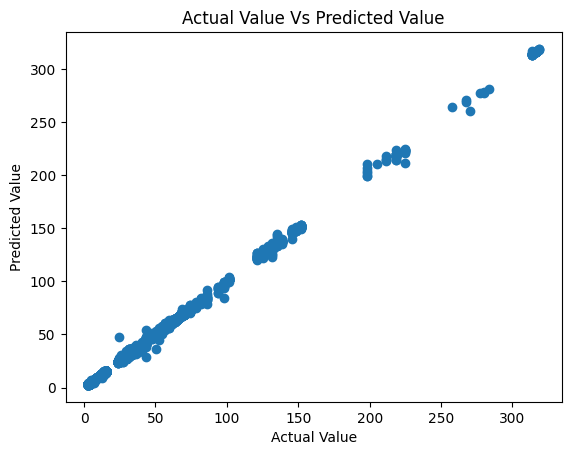

In [ ]:
plt.scatter(Z_test, z_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.show()

## New Data Prediction

In [ ]:
# Select the first row of the dataset as input for prediction
input_data = X.iloc[[0]]

# Predict the fish length using the trained decision tree regressor model
fish_length_prediction = model.predict(input_data)

# Predict the fish weight using the trained XGBoost regressor model
fish_weight_prediction = xgb_model.predict(input_data)

print("Fish Length Prediction:", fish_length_prediction[0])
print("Fish Weight Prediction:", fish_weight_prediction[0])


Fish Length Prediction: 2.9272838
Fish Weight Prediction: 2.8976696


save model file for development

In [ ]:
import pickle

# Save the trained decision tree regressor model
decision_tree_model_filename = "decision_tree_model.pkl"
with open(decision_tree_model_filename, 'wb') as file:
    pickle.dump(model, file)

# Save the trained XGBoost regressor model
xgboost_model_filename = "xgboost_model.pkl"
with open(xgboost_model_filename, 'wb') as file:
    pickle.dump(xgb_model, file)
